In [3]:
import pandas as pd

df = pd.read_csv('Data Collection for ML mini project (Responses) - Form Responses 1.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| Timestamp          | Age    | Height                                              | Weight                                | Cuisine_top1   | Cuisine_top2   | Cuisine_top3   | Spice Tolerance   | Dietary Preference   | Eating Out Per week   | Food Budget per meal Note: Provide integer value for eg like-199   | Sweet tooth level (1 is low and 5 is high)   | Tea vs Coffee   | Movie_genre_top1   |   Movie_genre_top2     |   Movie_genre_top3    |   Series_genre_top1     |   Series_genre_top2     |   Series_genre_top3     |   Content_lang_top1     |   Content_lang_top2     |   Content_lang_top3     | Ott Top1   | Ott Top2         | Ott Top3         |   Binge frequency per week     |   Screen Time Movies/series in hours per week     |   Gaming days per week     |   Gaming hours per week                    |   Game Genre Top1   |   Game Genre Top2   |   Game Genre Top3     |   Gaming Platform Top1   |   Gaming Platform Top2    |   Gaming Platform Top3     |   Esports Viewing      |   Social 

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,Spice Tolerance,Eating Out Per week,Sweet tooth level (1 is low and 5 is high),Binge frequency per week,Gaming days per week,Listening hours per day,Live concerts past year,Ethical shopping importance,Travel frequency per year\nChoose any value from here,"Travel Planning Preference \n numeric Like (1=Spontaneous, 5=Highly Planned)",...,Weekly_hobby_hours \nprovide values integer between between 0-40_40,Weekly_hobby_hours \nprovide values integer between between 0-40_4hrs,Weekly_hobby_hours \nprovide values integer between between 0-40_5,Weekly_hobby_hours \nprovide values integer between between 0-40_6,Weekly_hobby_hours \nprovide values integer between between 0-40_7,Weekly_hobby_hours \nprovide values integer between between 0-40_8,Weekly_hobby_hours \nprovide values integer between between 0-40_9,Weekly_hobby_hours \nprovide values integer between between 0-40_Kk,Weekly_hobby_hours \nprovide values integer between between 0-40_No,Weekly_hobby_hours \nprovide values integer between between 0-40_Not fixed
0,2,7,4,4,3,2,6,2,7,1,...,False,False,False,False,False,False,False,False,False,False
1,5,7,2,2,7,1,0,4,4,2,...,True,False,False,False,False,False,False,False,False,False
2,5,3,2,3,7,1,1,2,2,2,...,False,False,True,False,False,False,False,False,False,False
3,4,7,4,2,2,1,1,4,10,4,...,False,False,False,False,False,False,False,False,False,False
4,3,4,4,3,2,2,0,5,3,5,...,False,False,True,False,False,False,False,False,False,False


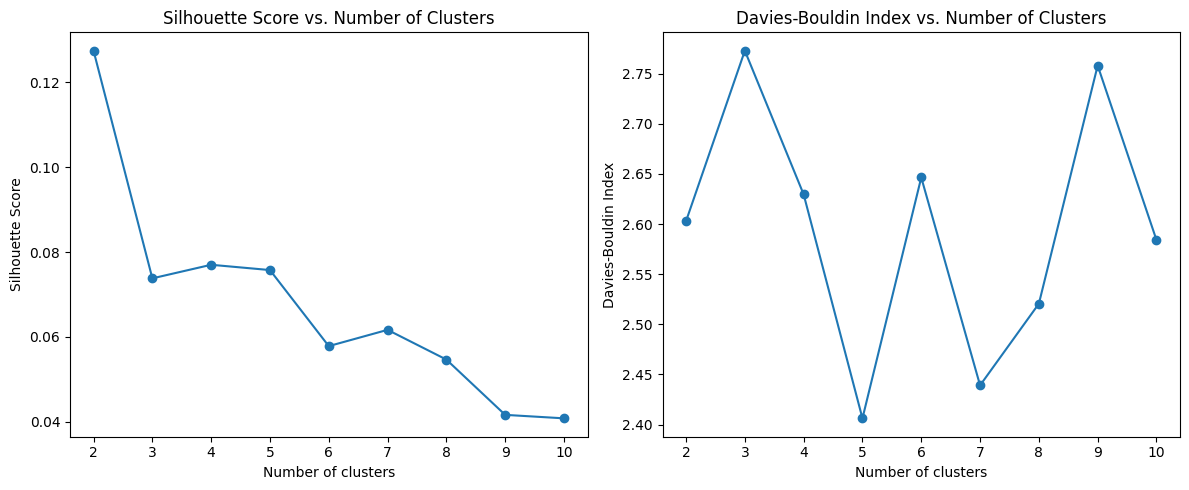

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_scores = []
davies_bouldin_indices = []
k_range = range(2, 11)

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_encoded, labels))
    davies_bouldin_indices.append(davies_bouldin_score(df_encoded, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_indices, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')

plt.tight_layout()
plt.show()

In [6]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_encoded)
df['cluster_label'] = kmeans.labels_
display(df.head())

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)",cluster_label
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Writing,Robotics Club,Music Club,0,2,2,2,2,3,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Cricket,Coding Club,Sports Club,40,3,2,3,5,3,4
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Coding,Coding Club,Sports Club,5,3,4,3,4,3,4
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5,8
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1,6


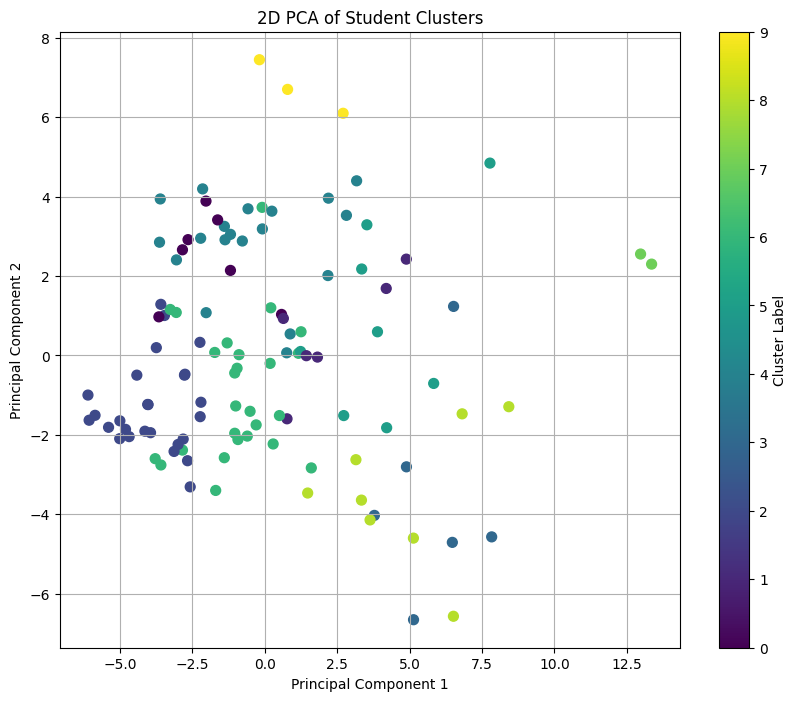

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca_component_1', 'pca_component_2'])
pca_df['cluster_label'] = df['cluster_label']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['pca_component_1'], pca_df['pca_component_2'], c=pca_df['cluster_label'], cmap='viridis', s=50)
plt.title('2D PCA of Student Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [8]:
silhouette_avg = silhouette_score(df_encoded, df['cluster_label'])
davies_bouldin_avg = davies_bouldin_score(df_encoded, df['cluster_label'])

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")

Silhouette Score: 0.04
Davies-Bouldin Index: 2.58


In [10]:
cluster_counts = df['cluster_label'].value_counts().sort_index()
print("Number of students in each cluster:")
print(cluster_counts.to_markdown(numalign="left", stralign="left"))

print("\nCluster Characteristics:")

for cluster_id in cluster_counts.index:
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = df[df['cluster_label'] == cluster_id]

    numerical_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns.drop('cluster_label', errors='ignore')
    if not numerical_cols.empty:
        print("Numerical Feature Statistics:")
        print(cluster_data[numerical_cols].describe().to_markdown(numalign="left", stralign="left"))

    categorical_cols = cluster_data.select_dtypes(include='object').columns
    if not categorical_cols.empty:
        print("Categorical Feature Top Values:")
        for col in categorical_cols:
            if not cluster_data[col].empty:
                top_values = cluster_data[col].value_counts().head(5)
                print(f"- {col}:")
                print(top_values.to_markdown(numalign="left", stralign="left"))


Number of students in each cluster:
| cluster_label   | count   |
|:----------------|:--------|
| 0               | 7       |
| 1               | 6       |
| 2               | 26      |
| 3               | 6       |
| 4               | 19      |
| 5               | 8       |
| 6               | 26      |
| 7               | 2       |
| 8               | 8       |
| 9               | 3       |

Cluster Characteristics:

--- Cluster 0 ---
Numerical Feature Statistics:
|       | Spice Tolerance   | Eating Out Per week   | Sweet tooth level (1 is low and 5 is high)   |   Binge frequency per week     |   Gaming days per week     |   Listening hours per day     |   Live concerts past year     |   Ethical shopping importance     |   Travel frequency per year    |   Travel Planning Preference                         |   Introversion extraversion     |   Risk taking     |   Conscientiousness     |   Open to new experiences     |   Teamwork preference                        |
|       |          